In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook




In [2]:
data='/home/nox/Masterarbeit/data/Daten/data_C_int/C-data-master.h5'

In [3]:
dm = pd.read_hdf(data)

In [76]:
d = dm.loc['2015-08-23']

In [77]:
alld = d[['mpc100','irradiation_hs','naive100']].reset_index()

In [78]:

irr = alld[['irradiation_hs']].values.flatten()
mpc = alld[['mpc100']].values.flatten()
naive = alld[['naive100']].values.flatten()


In [79]:
x = np.arange(0,irr.shape[0])

print(x.shape,irr.shape,mpc.shape)

(6376,) (6376,) (6376,)


<IPython.core.display.Javascript object>


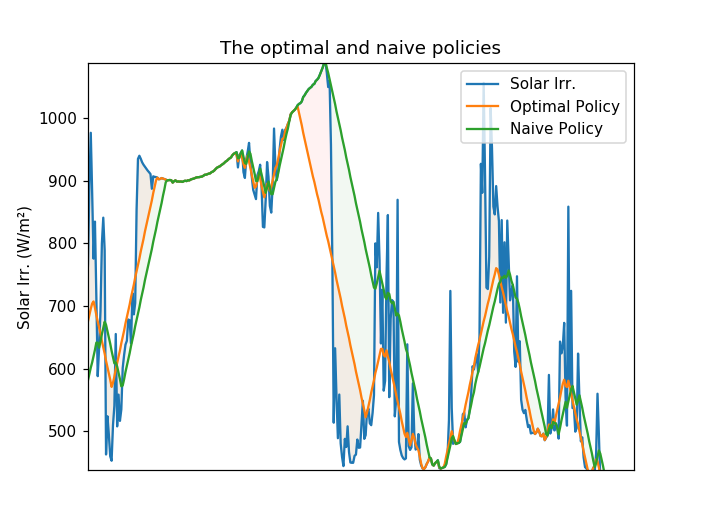

In [94]:
fig, ax = plt.subplots()

ax.plot(x, irr,label='Solar Irr.')
ax.plot(x,mpc,label='Optimal Policy')
ax.plot(x,naive,label='Naive Policy')
ax.set_title('The optimal and naive policies')


ax.set_xlim([2562,2955])
ax.set_ylim([438,1088])

plt.ylabel('Solar Irr. (W/m²)')
ax.get_xaxis().set_visible(False)

legend = ax.legend(loc='upper right')
ax.fill_between(x, irr, mpc, color="red", alpha=0.05)
ax.fill_between(x, irr,naive, color="green", alpha=0.05)


plt.show()

<IPython.core.display.Javascript object>


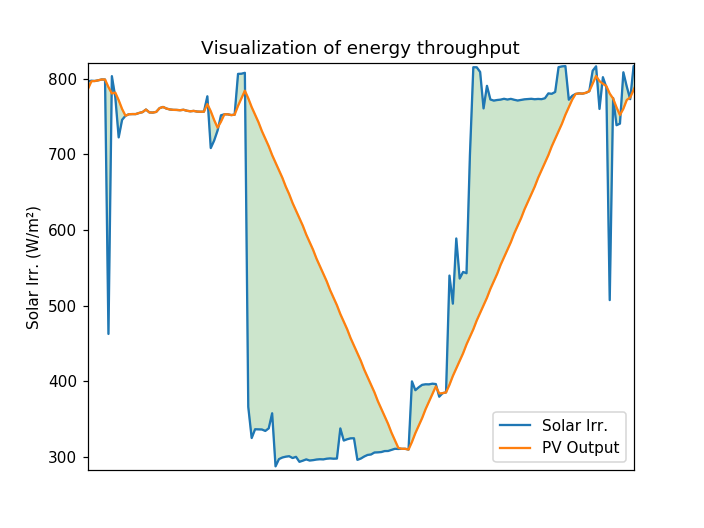

In [75]:
fig, ax = plt.subplots()

ax.plot(x, irr,label='Solar Irr.')
ax.plot(x,naive,label='PV Output')
ax.set_title('Visualization of energy throughput')


ax.set_xlim([2480,2640])
ax.set_ylim([283,820])

plt.ylabel('Solar Irr. (W/m²)')
ax.get_xaxis().set_visible(False)

legend = ax.legend(loc='lower right')
ax.fill_between(x, irr, naive, color="green", alpha=0.2)


plt.show()

In [112]:


df['tvalue'] = dm[['irradiation_hs']].index

In [138]:
df['delta'] = (df['tvalue']-df['tvalue'].shift()).fillna(0)
df['ans'] = df['delta'].apply(lambda x: x  / np.timedelta64(1,'s')).astype('int64') % (24*3600)


In [140]:
df.index = df['tvalue']

In [141]:
df.loc['2015-07-16'].tail()

,tvalue,delta,ans
tvalue,,,
2015-07-16 19:25:29,2015-07-16 19:25:29,00:00:07,7
2015-07-16 19:25:36,2015-07-16 19:25:36,00:00:07,7
2015-07-16 19:25:43,2015-07-16 19:25:43,00:00:07,7
2015-07-16 19:25:50,2015-07-16 19:25:50,00:00:07,7
2015-07-16 19:25:57,2015-07-16 19:25:57,00:00:07,7


In [171]:
dans = df['ans']
otup = df['ans']>600


In [175]:
h = df['ans'][otup.values]

In [180]:
otup.values

array([False, False, False, ..., False, False, False], dtype=bool)

In [143]:
df.loc['2015-07-17'].head()

,tvalue,delta,ans
tvalue,,,
2015-07-17 07:14:37,2015-07-17 07:14:37,11:48:40,0
2015-07-17 07:14:43,2015-07-17 07:14:43,00:00:06,6
2015-07-17 07:14:50,2015-07-17 07:14:50,00:00:07,7
2015-07-17 07:14:56,2015-07-17 07:14:56,00:00:06,6
2015-07-17 07:15:03,2015-07-17 07:15:03,00:00:07,7


In [157]:
a,b = np.histogram(df['ans'].values,bins='auto')

<IPython.core.display.Javascript object>


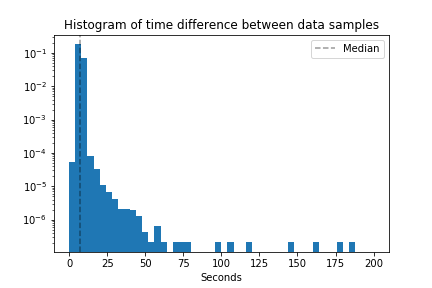

In [371]:
%matplotlib notebook
plt.title("Histogram of time difference between data samples")

plt.hist(df['ans'].values,bins=50,range=(0,200),normed=True)
plt.gca().set_yscale("log")
plt.xlabel('Seconds')
plt.axvline(x=7, color='k', linestyle='--',alpha=0.4,label='Median')
plt.legend()

In [380]:
(df[df['ans']>0]).min()

tvalue    2015-07-16 07:14:09
delta         0 days 00:00:05
ans                         5
irr                    -817.9
dtype: object

In [207]:
df[df['ans']>20]

,tvalue,delta,ans
tvalue,,,
2015-07-20 15:33:01,2015-07-20 15:33:01,00:02:57,177
2015-07-20 18:56:05,2015-07-20 18:56:05,00:00:27,27
2015-07-24 14:36:56,2015-07-24 14:36:56,00:02:40,160
2015-07-24 14:46:36,2015-07-24 14:46:36,00:02:24,144
2015-08-10 13:33:15,2015-08-10 13:33:15,00:01:47,107
2015-09-18 12:50:39,2015-09-18 12:50:39,00:00:29,29
2015-09-18 12:51:34,2015-09-18 12:51:34,00:00:21,21
2015-09-18 13:19:47,2015-09-18 13:19:47,00:00:24,24
2015-09-18 14:00:16,2015-09-18 14:00:16,00:00:44,44


In [228]:


irrdif= (dm['irradiation_hs']-dm['irradiation_hs'].shift()).fillna(0).values

In [230]:
irrdif

array([ 0. , -0.2,  0.6, ...,  0.1, -1. ,  0.2])

<IPython.core.display.Javascript object>


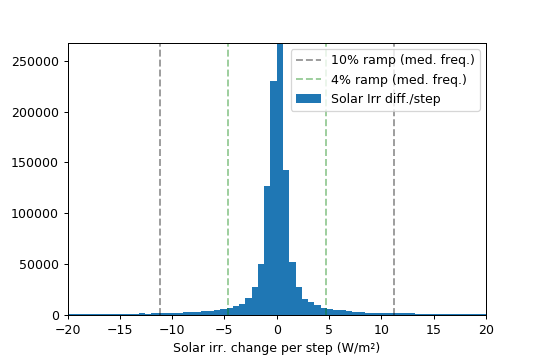

(0, 267296)

In [326]:
%matplotlib notebook
plt.plot((-1.6*7,-1.6*7 ), (0.0,267296), 'k--',alpha=0.4, label="10% ramp (med. freq.)")
plt.plot((1.6*7,1.6*7 ), (0.0,267296), 'k--',alpha=0.4)

plt.plot((-4.66,-4.66 ), (0.0,267296), 'g--',alpha=0.4,label="4% ramp (med. freq.)")
plt.plot((4.66,4.66 ), (0.0,267296), 'g--',alpha=0.4)

plt.hist(irrdif,bins=200,range=(-60,60),label='Solar Irr diff./step')
plt.xlabel('Solar irr. change per step (W/m²)')
plt.xlim(-20,20)
plt.legend()
plt.ylim(0,267296)



In [287]:
irrdif= (dm['irradiation_hs']-dm['irradiation_hs'].shift()).fillna(0).values

In [288]:
dm

,folder,name,irradiation_hs,mpc100,mpc40,naive100,naive100_new,naive40_new,T1,ghi,sun_x,sun_y
2015-07-16 07:14:02,C-2015-07-16,2015_07_16_07_14_02_Resize_sp_256.jpeg,162.4,162.4,162.400000,162.4,162.233333,162.233333,24.5,196.669431,1333.820510,1160.340943
2015-07-16 07:14:09,C-2015-07-16,2015_07_16_07_14_09_Resize_sp_256.jpeg,162.2,162.2,162.200000,162.2,162.228571,162.228571,24.4,197.023849,1333.540185,1160.408947
2015-07-16 07:14:15,C-2015-07-16,2015_07_16_07_14_15_Resize_sp_256.jpeg,162.8,162.8,162.800000,162.8,162.700000,162.700000,24.5,197.327725,1333.299912,1160.467107
2015-07-16 07:14:22,C-2015-07-16,2015_07_16_07_14_22_Resize_sp_256.jpeg,163.0,163.0,163.000000,163.0,162.971429,162.971429,24.4,197.682351,1333.019599,1160.534812
2015-07-16 07:14:28,C-2015-07-16,2015_07_16_07_14_28_Resize_sp_256.jpeg,163.3,163.3,163.300000,163.3,163.250000,163.250000,24.4,197.986405,1332.779336,1160.592716
2015-07-16 07:14:35,C-2015-07-16,2015_07_16_07_14_35_Resize_sp_256.jpeg,163.1,163.1,163.100000,163.1,163.128571,163.128571,24.6,198.341237,1332.499035,1160.660122
2015-07-16 07:14:41,C-2015-07-16,2015_07_16_07_14_41_Resize_sp_256.jpeg,164.2,164.2,164.200000,164.2,164.016667,164.016667,24.6,198.645465,1332.258783,1160.717770
2015-07-16 07:14:48,C-2015-07-16,2015_07_16_07_14_48_Resize_sp_256.jpeg,164.3,164.3,164.300000,164.3,164.285714,164.285714,24.5,199.000501,1331.978494,1160.784877
2015-07-16 07:14:54,C-2015-07-16,2015_07_16_07_14_54_Resize_sp_256.jpeg,165.1,165.1,165.100000,165.1,164.966667,164.966667,24.5,199.304906,1331.738252,1160.842270
2015-07-16 07:15:01,C-2015-07-16,2015_07_16_07_15_01_Resize_sp_256.jpeg,164.5,164.5,164.500000,164.5,164.585714,164.585714,24.5,199.660147,1331.457975,1160.909079


In [335]:
mpcdiff100 = (dm['mpc100']-dm['irradiation_hs']).abs().sum()
mpcdiff40 = (dm['mpc40']-dm['irradiation_hs']).abs().sum()

naivediff100 =  (dm['naive100_new']-dm['irradiation_hs']).abs().sum()
naivediff40 =  (dm['naive40_new']-dm['irradiation_hs']).abs().sum()


r100 = (naivediff100-mpcdiff100)/naivediff100
r40 = (naivediff40-mpcdiff40)/naivediff40
d100 = naivediff100-mpcdiff100
d40 = naivediff40-mpcdiff40
print(r100,r40,d100,d40)

0.3429587922 0.31812244399 6057168.93489 8568899.69965


<IPython.core.display.Javascript object>


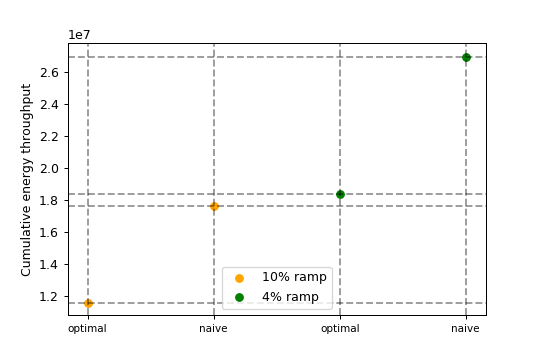

In [332]:
%matplotlib notebook

plt.scatter([1,2],[mpcdiff100,naivediff100],c='orange',label="10% ramp")
plt.scatter([3,4],[mpcdiff40,naivediff40],c='green',label="4% ramp")

l = ['optimal','naive','optimal','naive']

plt.xticks(range(1,len(l)+1), l, size='small')
plt.legend()
plt.axhline(y=mpcdiff100, color='k', linestyle='--',alpha=0.4)
plt.axhline(y=mpcdiff40, color='k', linestyle='--',alpha=0.4)
plt.axhline(y=naivediff100, color='k', linestyle='--',alpha=0.4)
plt.axhline(y=naivediff40, color='k', linestyle='--',alpha=0.4)

plt.axvline(x=1, color='k', linestyle='--',alpha=0.4)
plt.axvline(x=2, color='k', linestyle='--',alpha=0.4)
plt.axvline(x=3, color='k', linestyle='--',alpha=0.4)
plt.axvline(x=4, color='k', linestyle='--',alpha=0.4)

plt.ylabel('Cumulative energy throughput')


In [358]:
pvd = pd.read_csv('/media/nox/OS/Linux/Documents/Masterarbeit/Thesis/Data/data_C/C-2015-07-31.log',header=None,sep=' ')

In [359]:
pvd.describe()

,2,3,4,5,6,7
count,8753.0,8753.0,8753.000000,8753.000000,8753.000000,8753.000000
mean,0.0,0.0,349.227682,189.465360,27.542465,28.518668
std,0.0,0.0,321.425165,117.542057,4.101926,3.144967
min,0.0,0.0,0.000000,0.000000,18.800000,20.900000
25%,0.0,0.0,88.800000,83.300000,24.700000,26.500000
50%,0.0,0.0,261.100000,201.800000,28.200000,29.500000
75%,0.0,0.0,499.100000,289.400000,30.800000,30.600000
max,0.0,0.0,1151.100000,452.500000,36.000000,36.900000


<IPython.core.display.Javascript object>


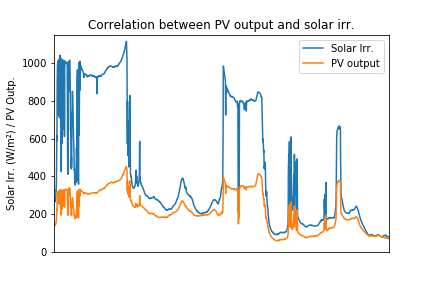

In [368]:

%matplotlib notebook
irr = pvd.ix[:,4].values
pv = pvd.ix[:,5].values

fig, ax = plt.subplots()

x = np.arange(0,irr.shape[0])
ax.plot(x, irr,label='Solar Irr.')
ax.plot(x,pv,label='PV output')
ax.set_title('Correlation between PV output and solar irr.')


ax.set_xlim([4500,7000])
ax.set_ylim([0,1150])

plt.ylabel('Solar Irr. (W/m²) / PV Outp.')
ax.get_xaxis().set_visible(False)

legend = ax.legend(loc='upper right')


plt.show()


<IPython.core.display.Javascript object>


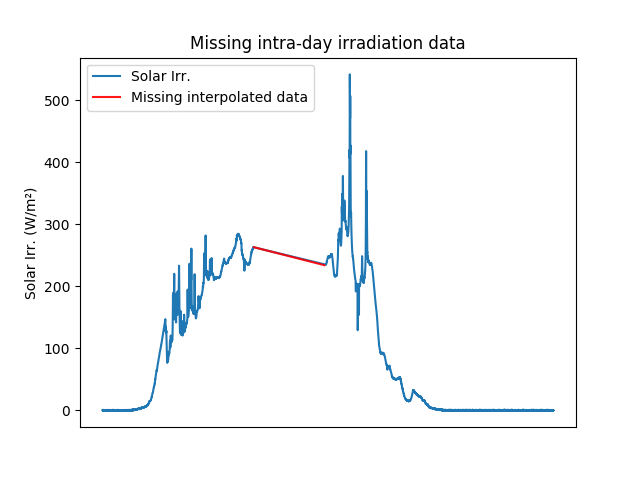

In [42]:
imp = pd.read_csv('/home/nox/Masterarbeit/Thesis/Data/send/C-2015-10-27-int.csv')
irr = imp.ix[:,1].values
x = np.arange(0,irr.shape[0])


fig, ax = plt.subplots()

ax.plot(x, irr,label='Solar Irr.')
plt.plot((19331,28339 ), (263,234), 'r',alpha=0.9, label='Missing interpolated data')

ax.set_title('Missing intra-day irradiation data')


#ax.set_xlim([2562,2955])
#ax.set_ylim([438,1088])

plt.ylabel('Solar Irr. (W/m²)')
ax.get_xaxis().set_visible(False)

plt.legend()

<IPython.core.display.Javascript object>


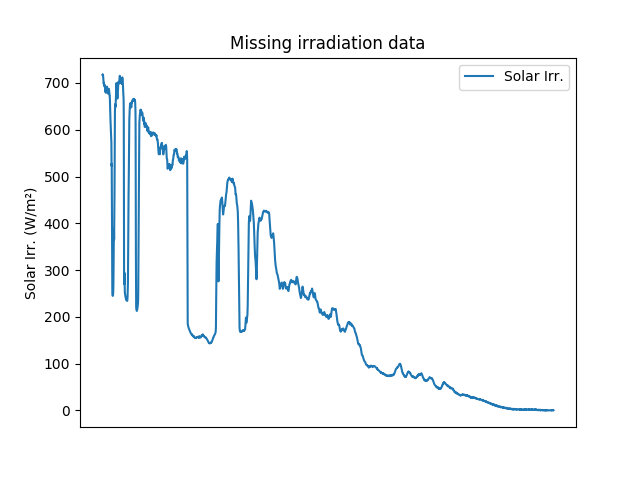

In [41]:
imp = pd.read_csv('/home/nox/Masterarbeit/Thesis/Data/send/C-2015-07-15-int.csv')
irr = imp.ix[:,1].values
x = np.arange(0,irr.shape[0])


fig, ax = plt.subplots()

ax.plot(x, irr,label='Solar Irr.')

ax.set_title('Missing irradiation data')


#ax.set_xlim([2562,2955])
#ax.set_ylim([438,1088])

plt.ylabel('Solar Irr. (W/m²)')
ax.get_xaxis().set_visible(False)

plt.legend()

<IPython.core.display.Javascript object>


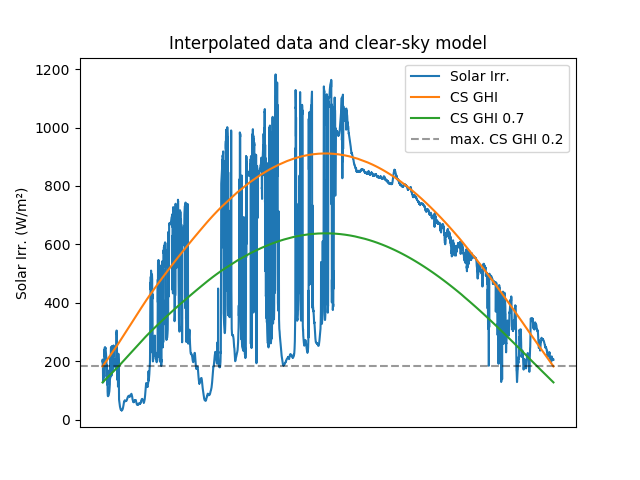

In [84]:
d = dm.loc['2015-08-17']
d

irr= d[['irradiation_hs']].values
mpc= d[['mpc100']].values
naive=d[['naive100_new']].values
ghi=d[['ghi']].values
ghi70=ghi*0.7
ghi20=np.max(ghi*0.2)



x = np.arange(0,irr.shape[0])


fig, ax = plt.subplots()

ax.plot(x, irr,label='Solar Irr.')
ax.plot(x, ghi,label='CS GHI')
ax.plot(x, ghi70,label='CS GHI 0.7')

plt.axhline(y=ghi20, color='k', linestyle='--',alpha=0.4,label='max. CS GHI 0.2')


ax.set_title('Interpolated data and clear-sky model')


#ax.set_xlim([2562,2955])
#ax.set_ylim([438,1088])

plt.ylabel('Solar Irr. (W/m²)')
ax.get_xaxis().set_visible(False)

plt.legend()


In [ ]:
from scipy import misc

a = misc.imread('/home/nox/Masterarbeit/data/Daten/img_C/C-2015-12-05/2015_12_05_14_32_20_Resize_sp_256.jpeg')

b = misc.imread('/home/nox/Masterarbeit/data/Daten/img_C/cavriglia_skymask256.png')
print(a.shape,b.shape)

c = a&b
misc.imshow(c)



(256, 256, 3) (256, 256, 3)


In [8]:

data='/home/nox/Masterarbeit/data/Daten/data_C_int/C-data-master.h5'
dm = pd.read_hdf(data)

In [33]:
test_f="/media/nox/OS/Linux/Documents/Masterarbeit/shared/dlabb/abb_deeplearning_keras/Source_code/models/test_list.out"
train_f="/media/nox/OS/Linux/Documents/Masterarbeit/shared/dlabb/abb_deeplearning_keras/Source_code/models/train_list.out"
validation_f="/media/nox/OS/Linux/Documents/Masterarbeit/shared/dlabb/abb_deeplearning_keras/Source_code/models/validation_list.out"

vf = open(validation_f,'r') 
trf = open(train_f,'r') 
tsf =  open(test_f,'r') 
v_days = vf.readlines()
tr_days = trf.readlines()
ts_days = tsf.readlines()


dm3 = dm['irradiation_hs']/dm['ghi']

dm4 = dm3.shift(9)
#print(dm4.head(20),dm3.head(20))

dm_v = dm3[np.in1d(dm3.index.date, pd.to_datetime(v_days).date)].reset_index().ix[:,1]
#dm_tr = dm3[np.in1d(dm3.index.date, pd.to_datetime(tr_days).date)].reset_index()['0']
#dm_ts = dm3[np.in1d(dm3.index.date, pd.to_datetime(ts_days).date)].reset_index()['0']


vf.close()
trf.close()
tsf.close()



In [83]:
dm_v0 = dm_v.shift(90)
dm_tr0 = dm_tr.shift(90)
dm_ts0 = dm_ts.shift(90)

dm_vv = pd.concat([dm_v0,dm_v],axis=1)
dm_vv.dropna(inplace=True)
dm_vv.columns=[['a','b']]
dm_vvsub = np.sqrt((((dm_vv.ix[:,0]-dm_vv.ix[:,1])**2).sum())/dm_vv.shape[0])

dm_trr = pd.concat([dm_tr0,dm_tr],axis=1)
dm_trr.dropna(inplace=True)
dm_trr.columns=[['a','b']]
dm_trrsub = np.sqrt((((dm_trr.ix[:,0]-dm_trr.ix[:,1])**2).sum())/dm_trr.shape[0])

dm_tss = pd.concat([dm_ts0,dm_ts],axis=1)
dm_tss.dropna(inplace=True)
dm_tss.columns=[['a','b']]
dm_tsssub = np.sqrt((((dm_tss.ix[:,0]-dm_tss.ix[:,1])**2).sum())/dm_tss.shape[0])


print(dm_vvsub,dm_trrsub,dm_tsssub)

"""
dm_v0.dropna(inplace=True)
dm_tr0.dropna(inplace=True)
dm_ts0.dropna(inplace=True)
"""

0.244612284081 0.239053765396 0.233521114026


'\ndm_v0.dropna(inplace=True)\ndm_tr0.dropna(inplace=True)\ndm_ts0.dropna(inplace=True)\n'